In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
print(iris.data[:5])
iris.frame = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.frame['label'] = iris.target_names[iris.target]
iris.frame.to_csv('iris.csv', index = False)
iris.frame.sample(5, random_state=1)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


In [4]:
print(iris.target_names, end=' -> ')
print(np.unique(iris.target))

iris.frame['label'].value_counts()

['setosa' 'versicolor' 'virginica'] -> [0 1 2]


label
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
print(iris.frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
print(iris.frame.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [8]:
iris.frame.drop(columns='label').mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [10]:
iris.frame.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


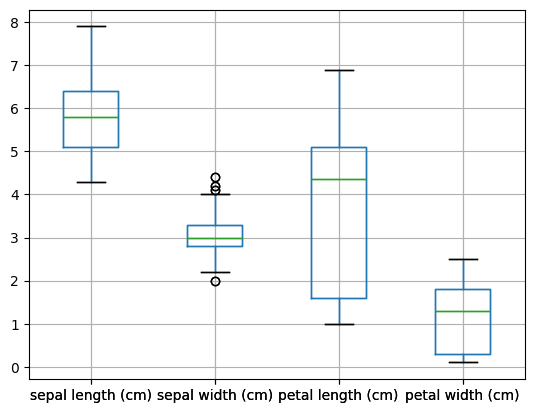

In [13]:
iris.frame.boxplot()
plt.show()

In [14]:
x2 = iris.frame.iloc[:, 1]
Q1, Q3 = x2.quantile([0.25, 0.75])
print(f'Q1 = {Q1}, Q3 = {Q3}')
IRQ = Q3 - Q1
이상치하한 = Q1 - 1.5*IRQ
이상치상한 = Q3 + 1.5*IRQ
print(f'{이상치하한} < [{Q1} < x2 < {Q3}] < {이상치상한}')

Q1 = 2.8, Q3 = 3.3
2.05 < [2.8 < x2 < 3.3] < 4.05


In [30]:
정상필터 = x2.between(이상치하한, 이상치상한)
print(정상필터[:5])
print(정상필터.value_counts())
비정상필터 = np.logical_not(정상필터)
iris.frame[비정상필터]

0    True
1    True
2    True
3    True
4    True
Name: sepal width (cm), dtype: bool
sepal width (cm)
True     146
False      4
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


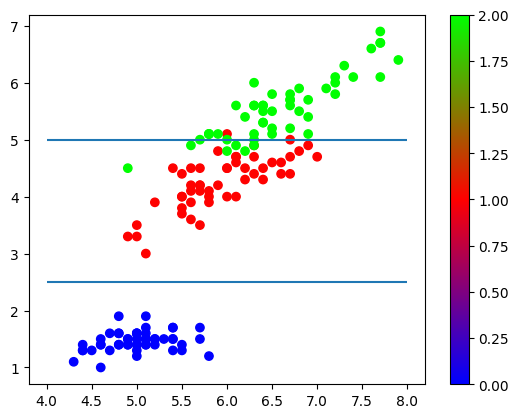

In [35]:
x1 = iris.frame.iloc[:, 0]
x3 = iris.frame.iloc[:, 2]

plt.scatter(x1, x3, c = iris.target, cmap = 'brg')
plt.colorbar()
plt.hlines(y=[2.5, 5.0], xmin = 4.0, xmax = 8.0)
plt.show()

In [38]:
samples = np.arange(10)
pd.DataFrame({
    '샘플': samples,
    'samples < 5': samples < 5,
    'np.where': np.where(samples < 5, -1, 1)
}).T

,0,1,2,3,4,5,6,7,8,9
샘플,0,1,2,3,4,5,6,7,8,9
samples < 5,True,True,True,True,True,False,False,False,False,False
np.where,-1,-1,-1,-1,-1,1,1,1,1,1
